# **Importing Libraries and Reading the Dataset**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib

In [2]:
df = pd.read_csv("/content/unprocessed data.csv")
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Data Cleaning**

**Dropping 'id' and 'Unnamed: 32'**

In [3]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

**Handling Outliers**

In [4]:
df.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 0.999, 1], numeric_only=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0.000,6.98100,9.71000,43.7900,143.500,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.75700,6.8020,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.02000,50.4100,185.200,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
0.100,10.26000,14.07800,65.8300,321.600,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,0.183080,0.640400,1.28020,13.1600,0.004224,0.009169,0.007726,0.005493,0.013012,0.001710,11.23400,17.80000,72.1780,384.720,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792
0.250,11.70000,16.17000,75.1700,420.300,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.60600,17.8500,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.01000,21.08000,84.1100,515.300,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
0.900,19.53000,24.99200,129.1000,1177.400,0.114820,0.175460,0.203040,0.100420,0.214940,0.072266,0.748880,1.909400,5.12320,91.3140,0.010410,0.047602,0.058520,0.018688,0.030120,0.006185,23.68200,33.64600,157.7400,1673.000,0.161480,0.447840,0.571320,0.208940,0.360080,0.106320
0.950,20.57600,27.15000,135.8200,1309.800,0.118780,0.208700,0.243020,0.125740,0.230720,0.076090,0.959520,2.212000,7.04160,115.8000,0.012644,0.060578,0.078936,0.022884,0.034988,0.007960,25.64000,36.30000,171.6400,2009.600,0.171840,0.564120,0.682380,0.236920,0.406160,0.119520
0.990,24.37160,30.65200,165.7240,1786.600,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,1.291320,2.915440,9.69004,177.6840,0.017258,0.089872,0.122292,0.031194,0.052208,0.012650,30.76280,41.80240,208.3040,2918.160,0.188908,0.778644,0.902380,0.269216,0.486908,0.140628
0.995,25.96840,32.64440,175.4640,2048.400,0.140232,0.284348,0.381064,0.185028,0.268840,0.093290,1.392240,3.580640,10.27200,225.5240,0.020913,0.098466,0.145352,0.035574,0.056816,0.018562,32.59080,44.95640,215.0880,3218.880,0.202072,0.878436,0.983872,0.277376,0.545888,0.145240
0.999,27.71808,36.17304,187.5912,2499.864,0.152778,0.326088,0.426573,0.195577,0.296389,0.096480,2.687832,4.323248,20.08856,532.7712,0.026700,0.118928,0.343630,0.046036,0.069016,0.025875,34.38712,48.18816,238.7608,3787.104,0.220214,0.989783,1.205424,0.290602,0.614725,0.187904
1.000,28.11000,39.28000,188.5000,2501.000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.98000,542.2000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.54000,251.2000,4254.000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df = df[df.area_mean<df.area_mean.quantile(0.997)]
df = df[df.smoothness_mean<df.smoothness_mean.quantile(0.998)]
df = df[df.compactness_mean<df.compactness_mean.quantile(0.999)]
df = df[df.fractal_dimension_mean<df.fractal_dimension_mean.quantile(0.995)]
df = df[df.radius_se<df.radius_se.quantile(0.997)]
df = df[df.texture_se<df.texture_se.quantile(0.998)]
df = df[df.perimeter_se<df.perimeter_se.quantile(0.997)]
df = df[df.area_se<df.area_se.quantile(0.995)]
df = df[df.smoothness_se<df.smoothness_se.quantile(0.995)]
df = df[df.compactness_se<df.compactness_se.quantile(0.999)]
df = df[df.concavity_se<df.concavity_se.quantile(0.9955)]
df = df[df['concave points_se']<df['concave points_se'].quantile(0.9995)]
df = df[df.symmetry_se<df.symmetry_se.quantile(0.998)]
df = df[df.fractal_dimension_se<df.fractal_dimension_se.quantile(0.995)]
df = df[df.area_worst<df.area_worst.quantile(0.995)]
df = df[df.symmetry_worst<df.symmetry_worst.quantile(0.998)]
df = df[df.fractal_dimension_worst<df.fractal_dimension_worst.quantile(0.997)]

In [6]:
df.shape

(532, 31)

# **Data Visualization**

**Histograms of The Features**

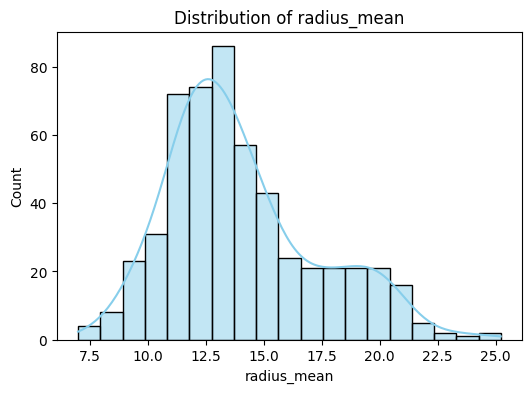

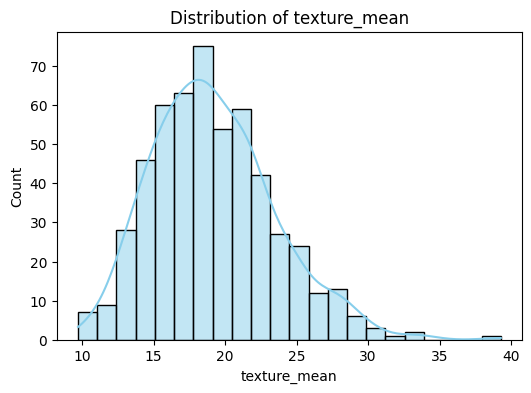

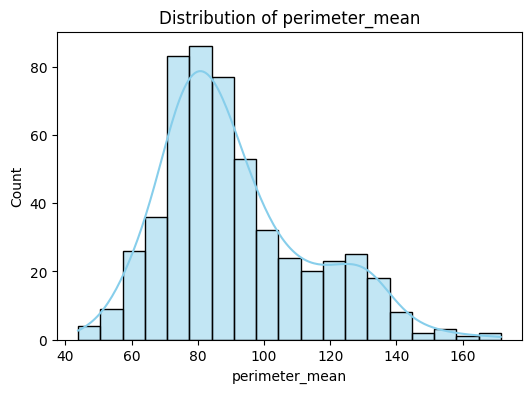

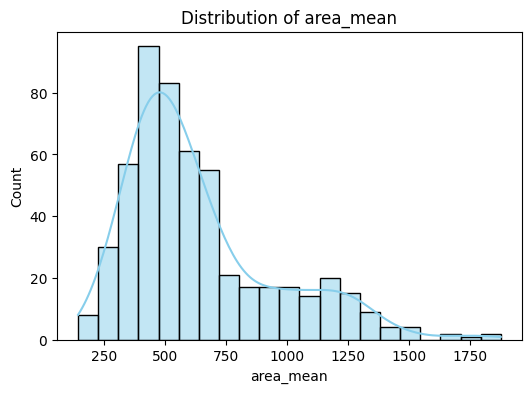

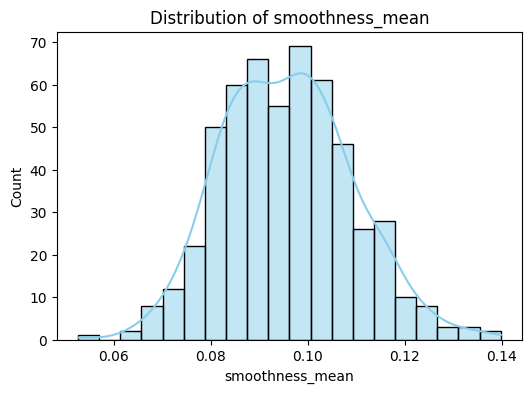

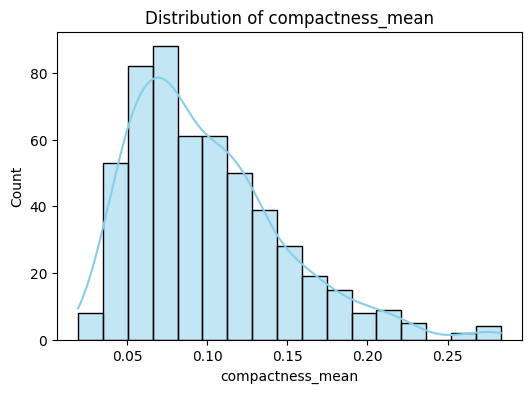

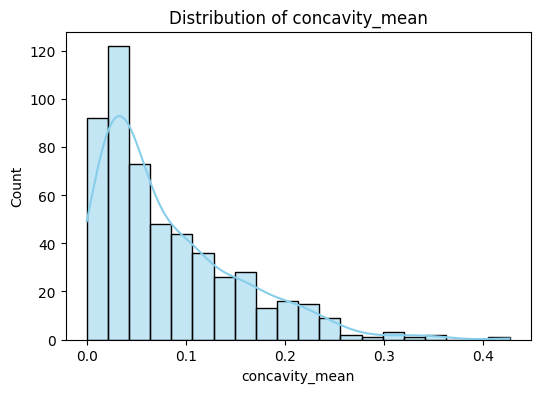

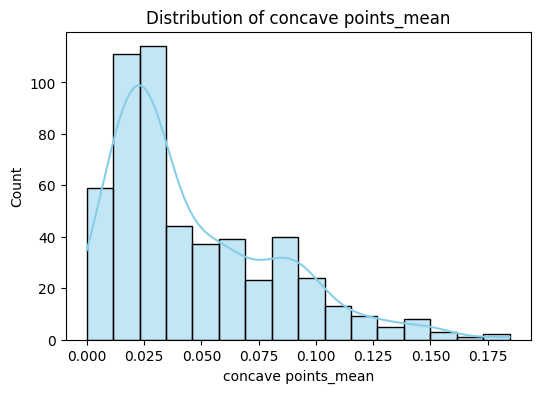

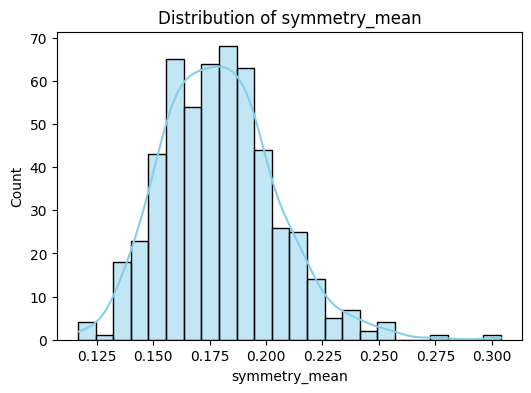

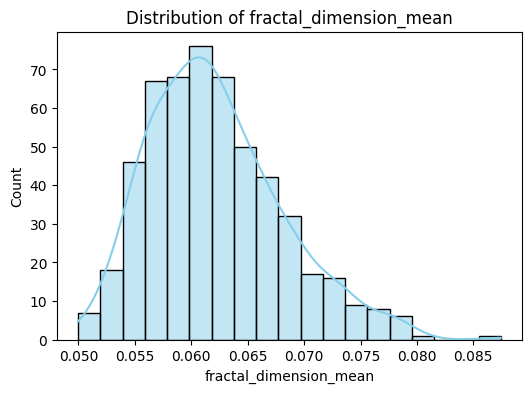

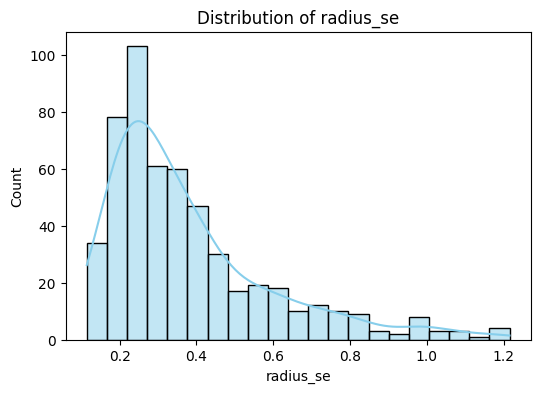

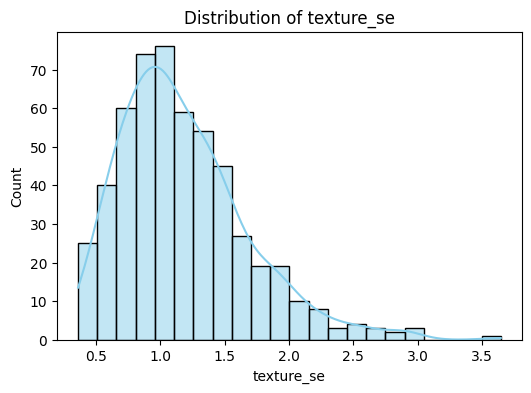

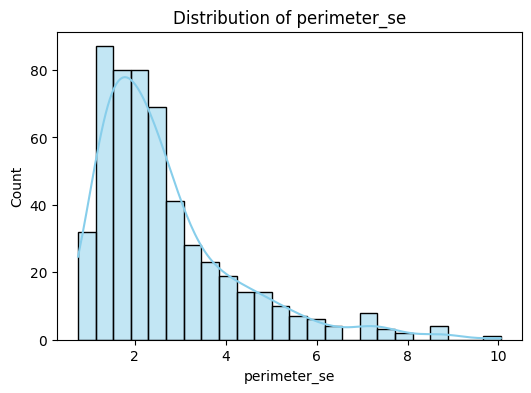

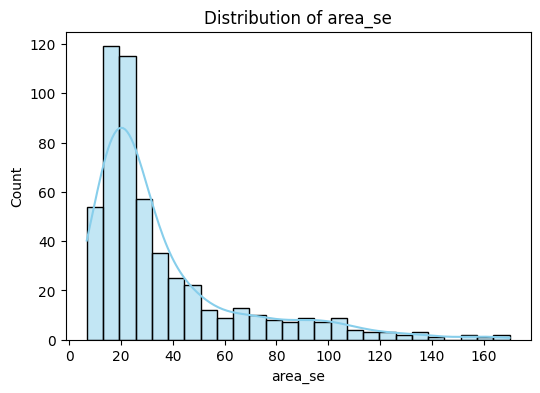

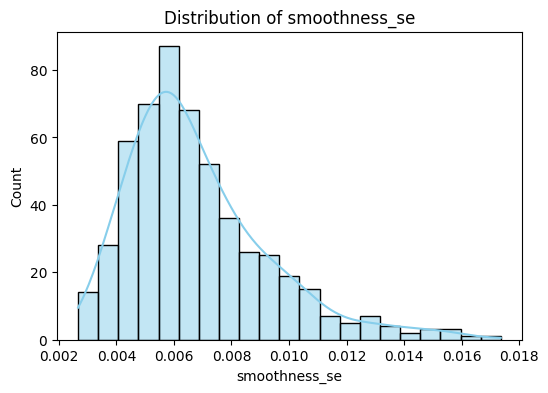

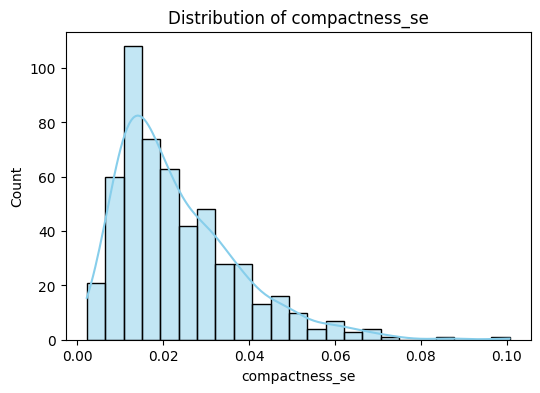

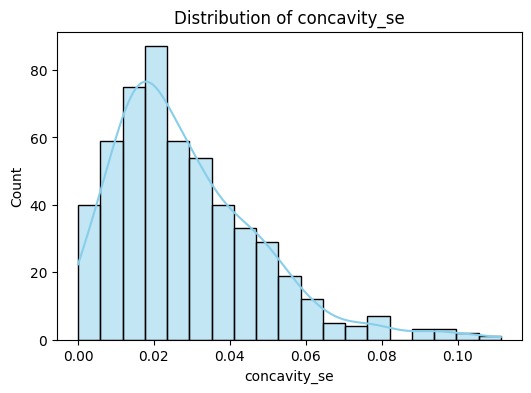

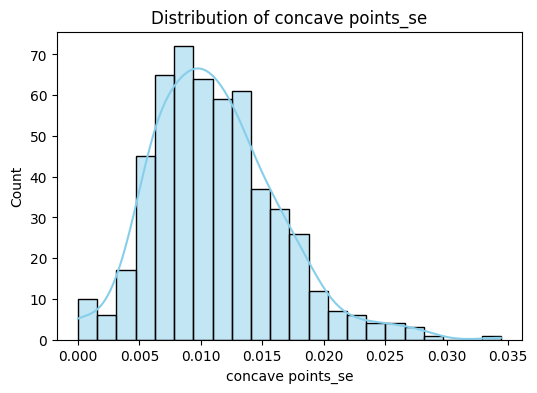

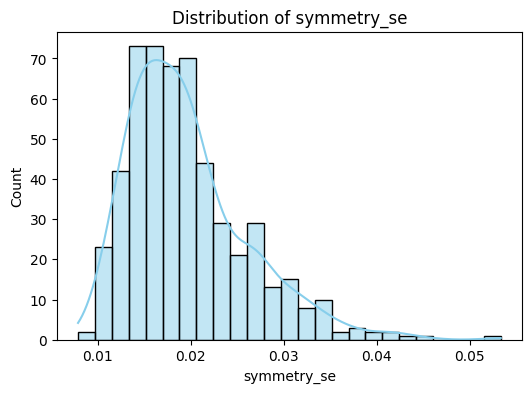

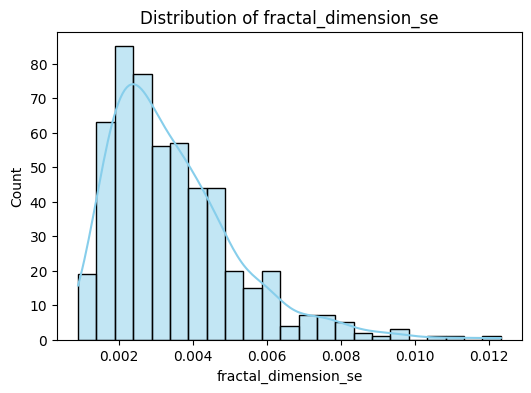

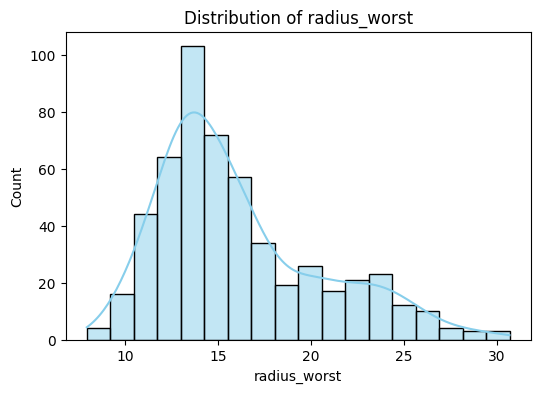

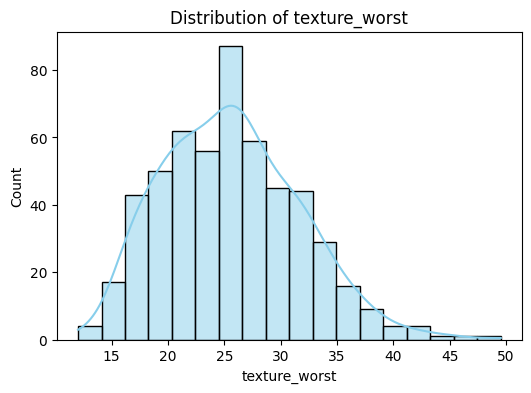

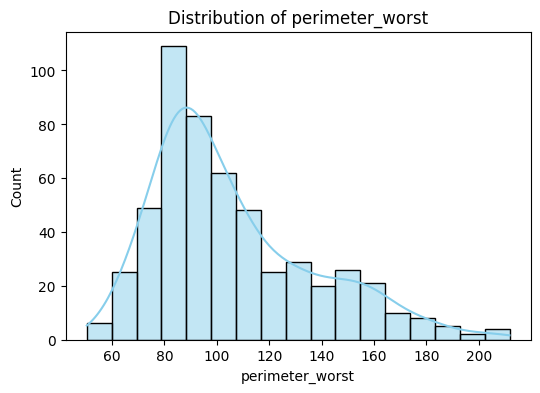

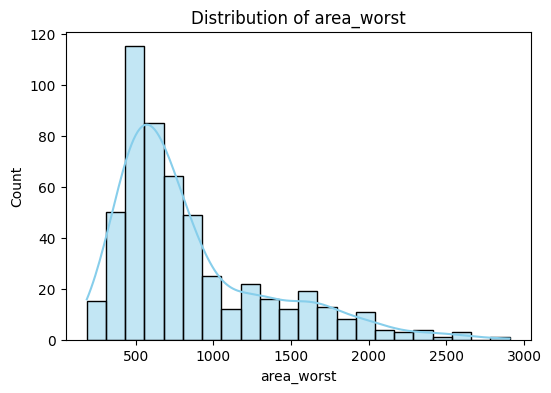

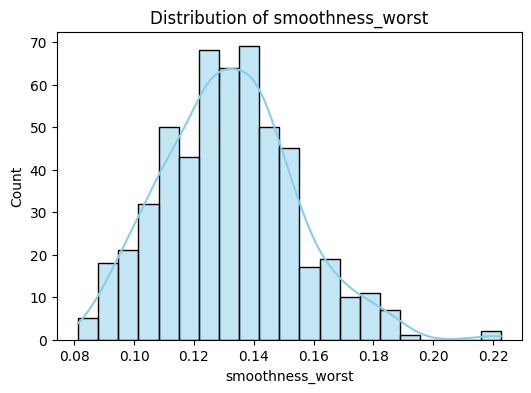

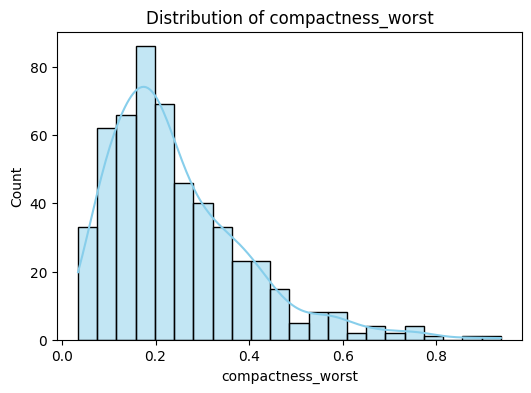

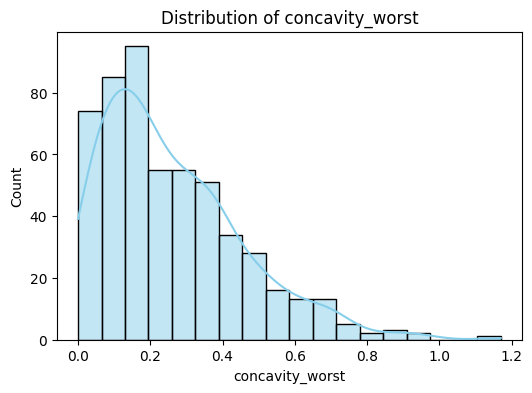

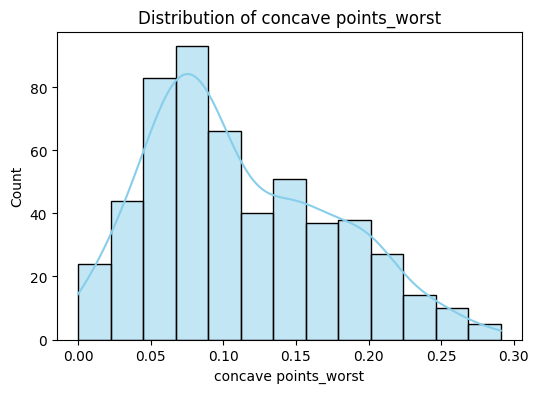

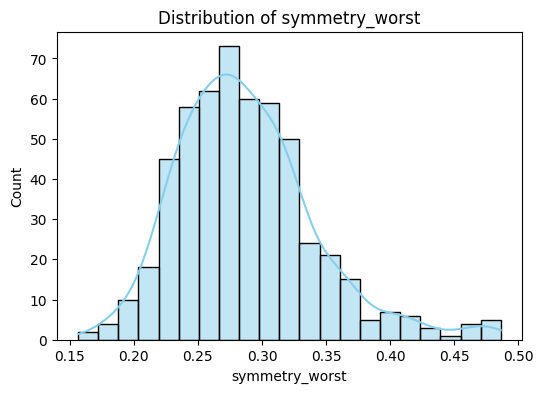

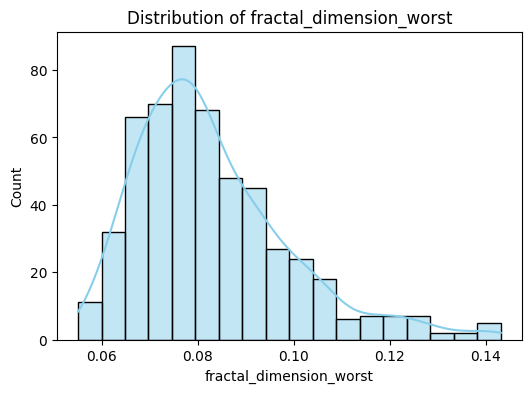

In [7]:
X=df.drop("diagnosis",axis=1)
num_cols = X.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], color='skyblue', kde=True, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.show()

**Count Plot of The diagnosis column**

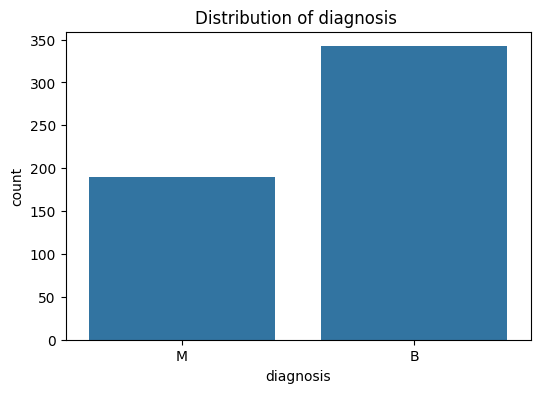

In [8]:
Y=df["diagnosis"]
plt.figure(figsize=(6, 4))
sns.countplot(x = Y)
plt.title("Distribution of diagnosis ")
plt.show()

**Heatmap of The features**

<Axes: >

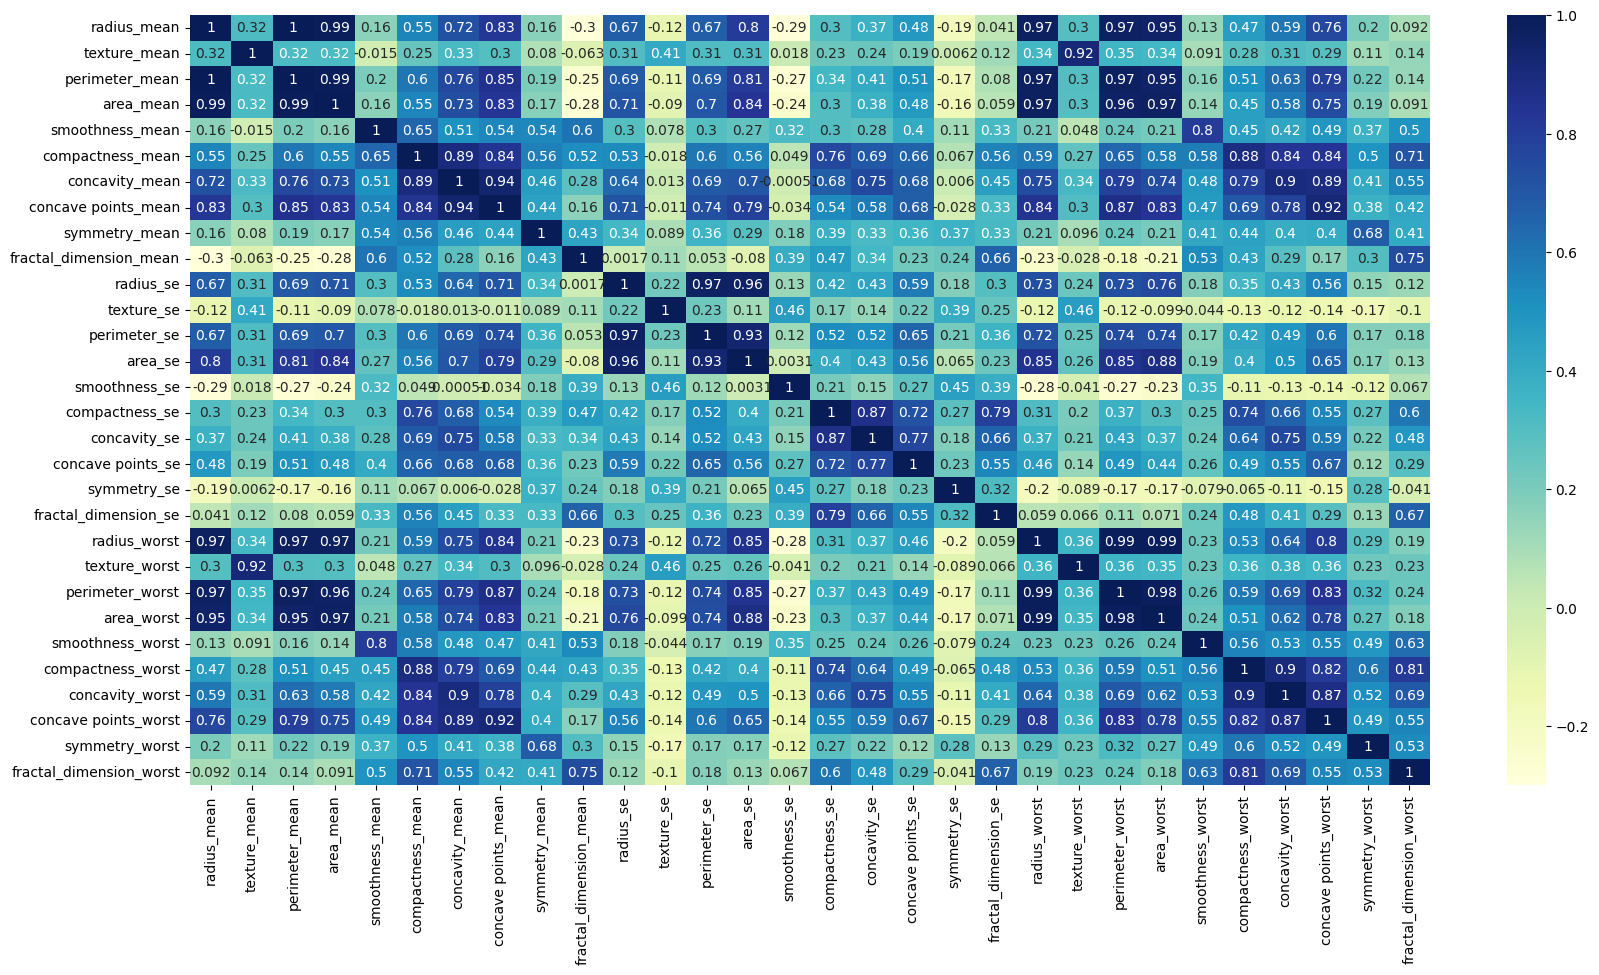

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

# **Splitting Data**

*  Keep in mind that all of the features are numerical

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [11]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape:',X_test.shape)

Train dataset shape: (425, 30)
Test dataset shape: (107, 30)


# **Features Scaling & Target Encoding**

In [17]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [18]:
Y.replace({'M':1 , 'B':0} ,inplace=True)

# **Saving The Processed Data**

In [20]:
joblib.dump(X_train, "X_train.pkl")

['X_train.pkl']

In [21]:
joblib.dump(X_test, "X_test.pkl")

['X_test.pkl']

In [24]:
joblib.dump(Y_train, "Y_train.pkl")

['Y_train.pkl']

In [25]:
joblib.dump(Y_test, "Y_test.pkl")

['Y_test.pkl']